In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
test.tail(80)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
338,1230,2,"Denbury, Mr. Herbert",male,25.00,0,0,C.A. 31029,31.5000,NaN,S
339,1231,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C
340,1232,2,"Fillbrook, Mr. Joseph Charles",male,18.00,0,0,C.A. 15185,10.5000,NaN,S
341,1233,3,"Lundstrom, Mr. Thure Edvin",male,32.00,0,0,350403,7.5792,NaN,S
342,1234,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.5500,NaN,S
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.00,0,1,PC 17755,512.3292,B51 B53 B55,C
344,1236,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S
345,1237,3,"Abelseth, Miss. Karen Marie",female,16.00,0,0,348125,7.6500,NaN,S
346,1238,2,"Botsford, Mr. William Hull",male,26.00,0,0,237670,13.0000,NaN,S
347,1239,3,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.00,0,0,2688,7.2292,NaN,C


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

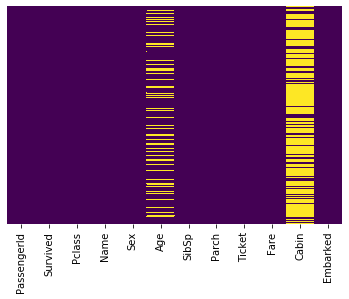

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

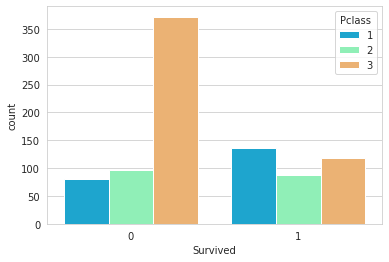

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

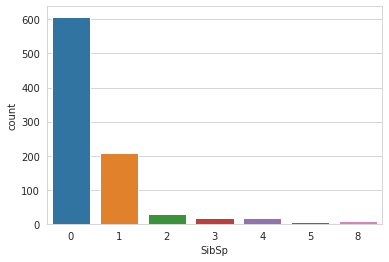

In [7]:
sns.countplot(x='SibSp',data=train)

In [8]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [9]:
train['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [10]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Jonkheer      1
Capt          1
Countess      1
Name: Title, dtype: int64

In [11]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [12]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [14]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

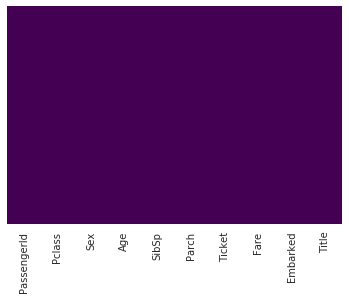

In [15]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0


In [17]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark1 = pd.get_dummies(test['Embarked'],drop_first=True)
sex1 = pd.get_dummies(test['Sex'],drop_first=True)

train.drop(['Sex','Embarked'],axis=1,inplace=True)
test.drop(['Sex','Embarked'],axis=1,inplace=True)


train = pd.concat([train,sex,embark],axis=1)
test = pd.concat([test,sex1,embark1],axis=1)

In [18]:
test.tail()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Title,male,Q,S
413,1305,3,24.0,0,0,A.5. 3236,8.0500,0,1,0,1
414,1306,1,39.0,0,0,PC 17758,108.9000,3,0,0,0
415,1307,3,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,1,0,1
416,1308,3,24.0,0,0,359309,8.0500,0,1,0,1
417,1309,3,24.0,1,1,2668,22.3583,3,1,0,0


In [19]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [20]:
train.drop(['Ticket'],axis=1,inplace=True)
test.drop(['Ticket'],axis=1,inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,2,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived','PassengerId'],axis=1), 
                                                    train['Survived'], test_size=0.30)


X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S
349,3,42.0,0,0,8.6625,0,1,0,1
10,3,4.0,1,1,16.7000,1,0,0,1
811,3,39.0,0,0,24.1500,0,1,0,1
709,3,24.0,1,1,15.2458,3,1,0,0
746,3,16.0,1,1,20.2500,0,1,0,1


In [24]:
clf = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

/home/mwanve/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mwanve/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mwanve/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mwanve/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mwanve/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

83.12

In [25]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

81.68

In [26]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

81.51

In [27]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

/home/mwanve/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mwanve/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mwanve/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mwanve/.local/lib/python3.6/site-packages/sklearn/svm/base

70.26

In [28]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

76.7

In [29]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

73.34

In [30]:
test = test.fillna(test.mean())
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
male           0
Q              0
S              0
dtype: int64

In [31]:
clf = LogisticRegression()
clf.fit(train.drop(['Survived','PassengerId'],axis=1),train['Survived'])
test_data = test.drop("PassengerId", axis=1)
predictions3 = clf.predict(test_data)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions3
    })

/home/mwanve/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.7 KB
